# Which is the correct code block?

In this etivity, we are building up to calibrating the SIR model to our flu outbreak data from previous exercises using **likelihood** as a measure of the divergence between the model projections and the data. 

This time, even though we are looking at the same outbreak, the dataset only shows the **reported cases**, and we know that 60% of flu cases are reported. We have provided you with all the code you need below - you just have to find the correct one!

First, run the following cell to load the model function, inputs and datasets as before. The code first produces a plot of the dataset, then simulates the SIR model using the parameter values we found in the manual calibration to the full dataset of the total number infected. 

Loading required package: deSolve
Loading required package: reshape2
Loading required package: ggplot2


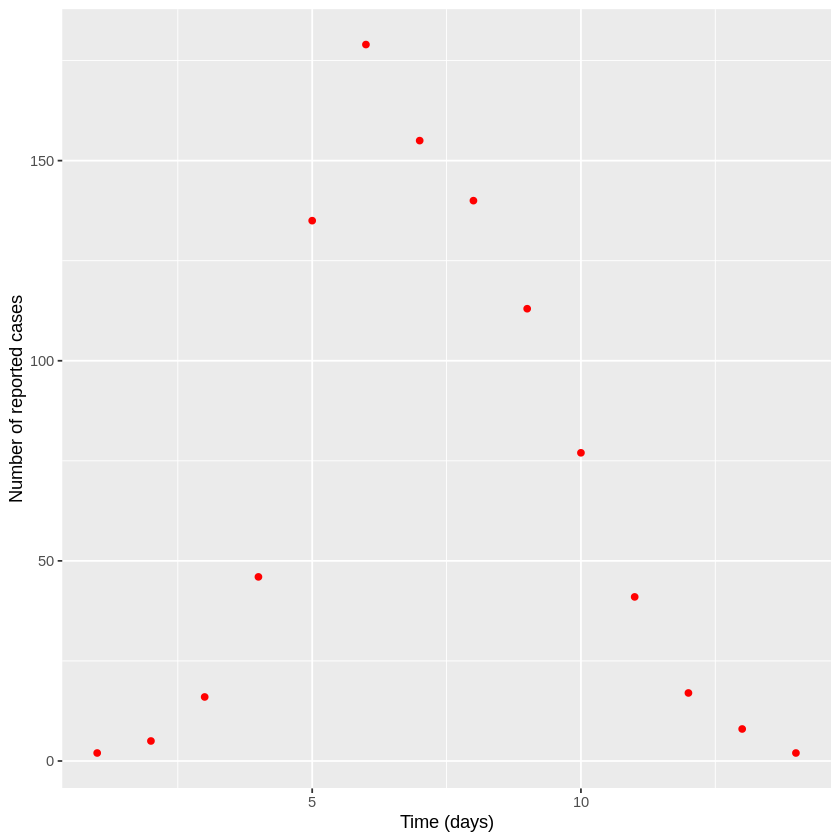

In [1]:
# PACKAGES
require(deSolve)
require(reshape2)
require(ggplot2)

# Load the flu dataset of reported cases
reported_data <- read.csv("../GraphicsAndData/idm2_sir_reported_data.csv")

# Plot of the data

ggplot() +
  geom_point(data = reported_data, aes(x = time, y = number_reported), colour = "red") + 
  xlab("Time (days)")+                                              
  ylab("Number of reported cases")

# INPUT
initial_state_values <- c(S = 762,  
                          I = 1,       
                          R = 0)

parameters <- c(beta = 1.7,
                gamma = 0.45) 

times <- seq(from = 0, to = 14, by = 0.1)

# SIR MODEL FUNCTION
sir_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {
    
    N <- S+I+R
    
    lambda <- beta * I/N
    
    # The differential equations
    dS <- -lambda * S               
    dI <- lambda * S - gamma * I
    dR <- gamma * I             
    
    # Output
    return(list(c(dS, dI, dR))) 
  })
}
    
# MODEL OUTPUT

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

Now, we want to calculate the likelihood of the model with these specific parameter values, i.e. the probability of observing these numbers of **reported** cases given our simulated numbers of **infected** people.

### Question: Look through the six code blocks below. Which is the correct approach to calculate the Poisson log-likelihood for the epidemic curve shown here? 

You can also print the LL variables to look at the output, and use the in-built help files for commands you don't recognise (e.g. run ?sum to look up what the sum command does). Note that there is no solution file provided for this etivity. Instead, answer the multiple-choice question attached to this lesson on Coursera to see if you were right!

In [ ]:
# Code block 1:
LL <- sum(0.6 * (dpois(x = reported_data$number_reported, lambda = output$I[output$time %in% reported_data$time])))

In [ ]:
# Code block 2:
LL <- prod(dpois(x = reported_data$number_reported, lambda = 0.6 * output$I[output$time %in% reported_data$time]))

In [ ]:
# Code block 3:
LL <- dpois(x = reported_data$number_reported, lambda = 0.6 * output$I[output$time %in% reported_data$time], log = TRUE)

In [ ]:
# Code block 4:
LL <- sum(dpois(x = reported_data$number_reported, lambda = 0.6 * output$I[output$time %in% reported_data$time], log = TRUE))

In [ ]:
# Code block 5:
LL <- prod(0.6 * (dpois(x = reported_data$number_reported, lambda = output$I[output$time %in% reported_data$time])))

In [ ]:
# Code block 6:
LL <- sum(dpois(x = reported_data$number_reported, lambda = output$I[output$time %in% reported_data$time], log = TRUE))

**Remember:** Our dataset contains the number of cases for each day, but we solve the differential equations of our model every 0.1 days (as defined in the "times" vector). This means we need to be careful to match the model output to the numbers from the dataset at the correct timepoints! We can do this by selecting the model output as follows:  

In [ ]:
output$I[output$time %in% reported_data$time]

This selects the simulated number of infected people only at all those timesteps which are present in the dataset "time" column.